In [1]:
import os
import numpy as np
import deepdish as dd
import pandas as pd
import nibabel as nb
import Functional_Fusion as FF
import Functional_Fusion.dataset as fdata # from functional fusion module
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import cortico_cereb_connectivity.cio as cio
import cortico_cereb_connectivity.summarize as cs
import matplotlib.pyplot as plt
import Functional_Fusion.atlas_map as am
import nitools as nt
from pathlib import Path
import warnings
import SUITPy as suit 
# fig_dir =  '/Users/jdiedrichsen/Dropbox (Diedrichsenlab)/Talks/2023/08_Gordon'

ModuleNotFoundError: No module named 'SUITPy'

In [8]:
print(suit.__file__)

None


In [3]:
# Compute the average connecivity for the model for each cortical parcel
traindata = 'MdWfIbDeNiSoScLa'
cortex_roi = "Icosahedron1002"
method = 'L2reg'
stats = 'prob'
cifti_img = cs.stats_weight_map_cortex(traindata = traindata,
                            cortex_roi = cortex_roi,
                            method = method,
                            extension='A8_global',
                            stats = stats)
fname = gl.conn_dir + f'/maps/{traindata}_{cortex_roi}_{method}_{stats}.pscalar.nii'
nb.save(cifti_img,fname)

In [4]:
# make the smoothed version of that map
fname = f'{traindata}_{cortex_roi}_{method}_{stats}.pscalar.nii'
oname = f'{traindata}_{cortex_roi}_{method}_{stats}.dscalar.nii'
cs.pscalar_to_smoothed_dscalar(fname,oname)

wb_command -cifti-smoothing 'temp.dscalar.nii' 4.0 0.0 COLUMN /cifs/diedrichsen/data/Cerebellum/connectivity/maps/MdWfIbDeNiSoScLa_Icosahedron1002_L2reg_prob.dscalar.nii -left-surface /cifs/diedrichsen/data/FunctionalFusion_new/Atlases/tpl-fs32k/tpl-fs32k_hemi-L_inflated.surf.gii -right-surface /cifs/diedrichsen/data/FunctionalFusion_new/Atlases/tpl-fs32k/tpl-fs32k_hemi-R_inflated.surf.gii


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


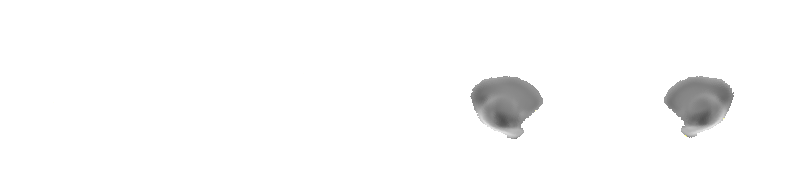

In [5]:
cifti_img = nb.load(gl.conn_dir + f'/maps/{traindata}_{cortex_roi}_{method}_{stats}.dscalar.nii')
data = nt.surf_from_cifti(cifti_img) 
fig, axes = plt.subplots(1, 4, subplot_kw={'projection': '3d'},figsize=(10, 8))
cs.plot_cortical_inflated(data=data,axes=axes, cscale=[0,0.2])


AttributeError: module 'SUITPy' has no attribute 'flatmap'

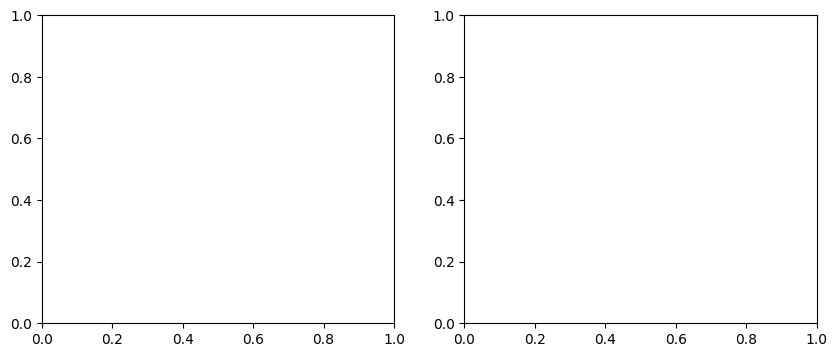

In [6]:
cifti_img = nb.load(gl.conn_dir + f'/maps/{traindata}_{cortex_roi}_{method}_{stats}.pscalar.nii')
data = nt.surf_from_cifti(cifti_img) 
fig, axes = plt.subplots(1, 2,figsize=(10, 4))
cs.plot_cortical_flatmap(data=data,axes = axes, cscale=[0,0.2],cmap='hot')

<Axes: >

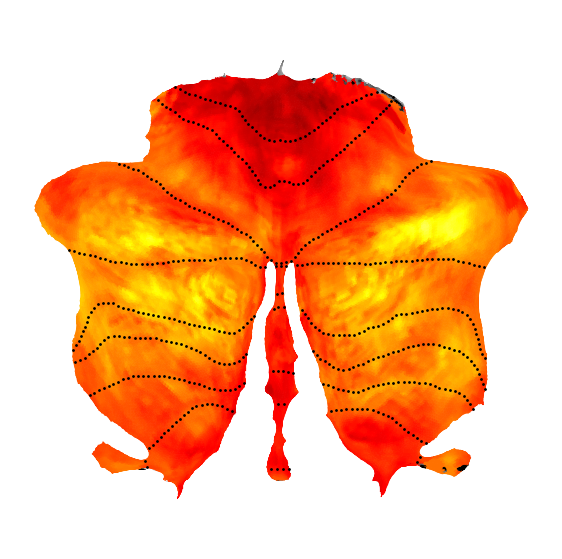

In [ ]:
nifti_img = cs.stats_weight_map_cerebellum(traindata = traindata,
                            cortex_roi = cortex_roi,
                            method = method,
                            extension='A2_group',
                            stats = 'mean')
data = suit.vol_to_surf(nifti_img,space='MNISymC')
suit.plot(data,cscale=[0,0.001],cmap='hot')